This notebook shows how to approximate the mean and variance of the Benes model

$$
d X(t) = \tanh (X(t)) dt + d W(t),
$$

by using the TME method in JaX. We also exemplify how to approximate 

$$
\mathbb{E}[\sin(X(t)) \mid X(t_0)].
$$

First, you need to have the package `tme` installed.

In [1]:
# Imports
import numpy as np
import jax.numpy as jnp

import tme.base_jax as tme

import matplotlib.pyplot as plt

from jax import jit
from typing import Tuple

First, let us write down the SDE coefficients and the sin()

In [2]:
def drift(x: jnp.ndarray) -> jnp.ndarray:
    return jnp.tanh(x)

# keep in mind that our implementation needs the dispersion to be matrix-valued.
bb = jnp.array([[1.]])
Qw = jnp.eye(1)

def dispersion(x: jnp.ndarray) -> jnp.ndarray:
    return bb

def esin(x: jnp.ndarray) -> jnp.ndarray:
    return jnp.sin(x)

It's done! We next just need to call the `tme.mean_and_cov()` and `tme.expectation()` functions. 

But, to make the best use of JaX, let's jit compile these functions. You can of course choose not to do so if you don't want jit.

In [3]:
@jit
def tme_m_cov(x: jnp.ndarray, dt: float) -> Tuple[jnp.ndarray, jnp.ndarray]:
    return tme.mean_and_cov(x=x, dt=dt, 
                            a=drift, b=dispersion, Qw=Qw,
                            order=3)

@jit
def tme_esin(x: jnp.ndarray, dt: float) -> jnp.ndarray:
    return tme.expectation(phi=esin,
                           x=x, dt=dt, 
                           a=drift, b=dispersion, Qw=Qw,
                           order=3)

Let us compute $\mathbb{E}[X(t) \mid X(0)]$, $\mathrm{Var}[X(t) \mid X(0)]$, and $\mathbb{E}[\sin(X(t)) \mid X(0)]$ for $t=0.01, \ldots, 4$ seconds.

In [4]:
# Initial value at t=0
x = jnp.array([0.5])

# Time instances
num_time_steps = 400
T = np.linspace(0.01, 4, num_time_steps)

# Result containers
m_results = np.zeros((num_time_steps, ))
var_results = np.zeros((num_time_steps, ))
esin_results = np.zeros((num_time_steps, ))

# Compute for t=0.01, ..., 4
for idx, t in enumerate(T):
    m_results[idx], var_results[idx] = tme_m_cov(x, t)
    esin_results[idx] = tme_esin(x, t)

Finally, we plot the results. 

**Please note that the TME-3 method here gives exact solutions of the mean and variance of the Benes SDE. In notebook `benes_sympy.ipynb` we compared with the exact solutions via numerical integrations. However, for simplicity, we are not plotting the exact solutions here.**

Text(0.5, 1.0, 'Approximation for the mean E[X(t) | X(0)].')

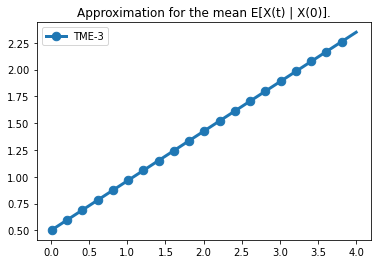

In [5]:
plt.plot(T, m_results,
         linewidth=3, marker='.', markevery=20, markersize=17,
         label='TME-3')
plt.legend(loc='upper left')
plt.title('Approximation for the mean E[X(t) | X(0)].')

Text(0.5, 1.0, 'Approximation for the variance Var[X(t) | X(0)].')

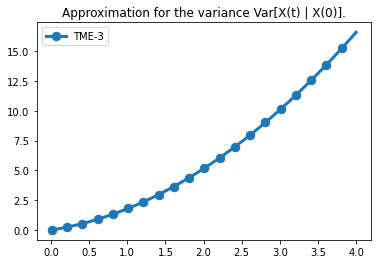

In [6]:
plt.plot(T, var_results,
         linewidth=3, marker='.', markevery=20, markersize=17,
         label='TME-3')
plt.legend(loc='upper left')
plt.title('Approximation for the variance Var[X(t) | X(0)].')

Text(0.5, 1.0, 'Approximation for E[sin(X(t)) | X(0)].')

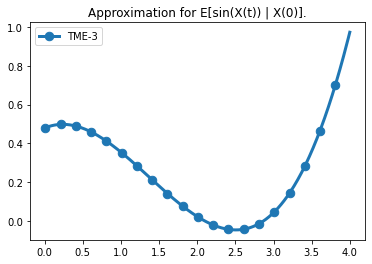

In [7]:
plt.plot(T, esin_results,
         linewidth=3, marker='.', markevery=20, markersize=17,
         label='TME-3')
plt.legend(loc='upper left')
plt.title('Approximation for E[sin(X(t)) | X(0)].')